<a href="https://colab.research.google.com/github/HiranmaiKaredla/NLP/blob/main/text_summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [ ]:
import sys
!{sys.executable} -m pip install spacy
!{sys.executable} -m spacy download en_core_web_sm

!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-02-27 03:02:53.901952: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-27 03:02:55.678091: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-27 03:02:55.678194: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could no

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import bs4 as bs
import urllib.request
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.util import ngrams
from string import punctuation
import pandas as pd

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


## Webscraping

### Task 1

#### 1.1

In [ ]:
data_url = "https://en.wikipedia.org/wiki/Natural_language_processing"

In [ ]:
def scrape_webpage(url):
  '''
  Function for scraping webpage
  '''
  # Open connection
  connection = urllib.request.urlopen(url)

  # Read data
  data = connection.read()

  # Parse xml
  parsed = bs.BeautifulSoup(data, 'lxml')

  # Get paragraphs
  paragraphs = parsed.find_all('p')

  # Get text from paragraphs
  text = [p.text for p in paragraphs]

  # Merge paragraph text into single string
  text = '\n'.join(text)
  return text

In [ ]:
# Scrape webpage
text = scrape_webpage(data_url)

# Print first 1000 char
print(text[:500], '...')

Natural language processing (NLP) is an interdisciplinary subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.  The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and  ...


#### 1.2

In [ ]:
'''
Parse into sentences
'''

# Load tokenizer
tokenizer = spacy.load('en_core_web_sm')

# Process with tokenizer
doc = tokenizer(text)

# Get sentences
sentences_orig = [[token.text for token in sent] for sent in doc.sents if not sent.text.isspace()]
print('')
print('Sentence examples, original')
for i in range(0, 5):
  print(f'{i} - {sentences_orig[i]}')

print('')
print('Sentence count', len(sentences_orig))


Sentence examples, original
0 - ['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'an', 'interdisciplinary', 'subfield', 'of', 'linguistics', ',', 'computer', 'science', ',', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', 'language', ',', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data', '.', ' ']
1 - ['The', 'goal', 'is', 'a', 'computer', 'capable', 'of', '"', 'understanding', '"', 'the', 'contents', 'of', 'documents', ',', 'including', 'the', 'contextual', 'nuances', 'of', 'the', 'language', 'within', 'them', '.']
2 - ['The', 'technology', 'can', 'then', 'accurately', 'extract', 'information', 'and', 'insights', 'contained', 'in', 'the', 'documents', 'as', 'well', 'as', 'categorize', 'and', 'organize', 'the', 'documents', 'themselves', '.', '\n\n']
3 - ['Challenges', 'in', 'natural', 'language', 'proce

In [ ]:
# Remove whitespace tokens
sentences = [[token for token in sent if not token.isspace()] for sent in sentences_orig]

print('Sentence examples, no ws')
for i in range(0, 5):
  print(f'{i} - {sentences[i]}')

Sentence examples, no ws
0 - ['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'an', 'interdisciplinary', 'subfield', 'of', 'linguistics', ',', 'computer', 'science', ',', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', 'language', ',', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data', '.']
1 - ['The', 'goal', 'is', 'a', 'computer', 'capable', 'of', '"', 'understanding', '"', 'the', 'contents', 'of', 'documents', ',', 'including', 'the', 'contextual', 'nuances', 'of', 'the', 'language', 'within', 'them', '.']
2 - ['The', 'technology', 'can', 'then', 'accurately', 'extract', 'information', 'and', 'insights', 'contained', 'in', 'the', 'documents', 'as', 'well', 'as', 'categorize', 'and', 'organize', 'the', 'documents', 'themselves', '.']
3 - ['Challenges', 'in', 'natural', 'language', 'processing', 'frequent

In [ ]:
# Get sentences lengths
sentences_length = np.array([len(sent) for sent in sentences])

print(f'Sentence lengths:\n{sentences_length}')

Sentence lengths:
[46 25 23 21 10 47 17 58 21 27 77 40 79 66 49 19 20 50 40 31 52 19 43 18
 18 14 20 61 39 56 18 28 18  7 20 42 32 25 54 66 68 46]


In [ ]:
# Remove punctuation
sentences = [[token for token in sent if not token in punctuation] for sent in sentences]

print('Sentence examples, no punct')
for i in range(0, 5):
  print(f'{i} - {sentences[i]}')

Sentence examples, no punct
0 - ['Natural', 'language', 'processing', 'NLP', 'is', 'an', 'interdisciplinary', 'subfield', 'of', 'linguistics', 'computer', 'science', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', 'language', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data']
1 - ['The', 'goal', 'is', 'a', 'computer', 'capable', 'of', 'understanding', 'the', 'contents', 'of', 'documents', 'including', 'the', 'contextual', 'nuances', 'of', 'the', 'language', 'within', 'them']
2 - ['The', 'technology', 'can', 'then', 'accurately', 'extract', 'information', 'and', 'insights', 'contained', 'in', 'the', 'documents', 'as', 'well', 'as', 'categorize', 'and', 'organize', 'the', 'documents', 'themselves']
3 - ['Challenges', 'in', 'natural', 'language', 'processing', 'frequently', 'involve', 'speech', 'recognition', 'natural', 

In [ ]:
# Remove numbers
sentences = [[token for token in sent if not re.match(r'^\d+$', token)] for sent in sentences]

print('Sentence examples, no punct')
for i in range(0, 5):
  print(f'{i} - {sentences[i]}')

Sentence examples, no punct
0 - ['Natural', 'language', 'processing', 'NLP', 'is', 'an', 'interdisciplinary', 'subfield', 'of', 'linguistics', 'computer', 'science', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', 'language', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data']
1 - ['The', 'goal', 'is', 'a', 'computer', 'capable', 'of', 'understanding', 'the', 'contents', 'of', 'documents', 'including', 'the', 'contextual', 'nuances', 'of', 'the', 'language', 'within', 'them']
2 - ['The', 'technology', 'can', 'then', 'accurately', 'extract', 'information', 'and', 'insights', 'contained', 'in', 'the', 'documents', 'as', 'well', 'as', 'categorize', 'and', 'organize', 'the', 'documents', 'themselves']
3 - ['Challenges', 'in', 'natural', 'language', 'processing', 'frequently', 'involve', 'speech', 'recognition', 'natural', 

In [ ]:
# sentences = [[token for token in sent if re.search('[\w]', token)] for sent in sentences]
# print('Sentence examples, no punct')
# for i in range(0, 5):
#   print(f'{i} - {sentences[i]}')

In [ ]:
# Lower case
sentences = [[token.lower() for token in sent] for sent in sentences]

print('Sentence examples, lower case')
for i in range(0, 5):
  print(f'{i} - {sentences[i]}')

Sentence examples, lower case
0 - ['natural', 'language', 'processing', 'nlp', 'is', 'an', 'interdisciplinary', 'subfield', 'of', 'linguistics', 'computer', 'science', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', 'language', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data']
1 - ['the', 'goal', 'is', 'a', 'computer', 'capable', 'of', 'understanding', 'the', 'contents', 'of', 'documents', 'including', 'the', 'contextual', 'nuances', 'of', 'the', 'language', 'within', 'them']
2 - ['the', 'technology', 'can', 'then', 'accurately', 'extract', 'information', 'and', 'insights', 'contained', 'in', 'the', 'documents', 'as', 'well', 'as', 'categorize', 'and', 'organize', 'the', 'documents', 'themselves']
3 - ['challenges', 'in', 'natural', 'language', 'processing', 'frequently', 'involve', 'speech', 'recognition', 'natural'

In [ ]:
# Remove stop words
sw = stopwords.words('english')
sentences = [[token for token in sent if token not in sw] for sent in sentences]

print('Sentence examples, no stop words')
for i in range(0, 5):
  print(f'{i} - {sentences[i]}')

Sentence examples, no stop words
0 - ['natural', 'language', 'processing', 'nlp', 'interdisciplinary', 'subfield', 'linguistics', 'computer', 'science', 'artificial', 'intelligence', 'concerned', 'interactions', 'computers', 'human', 'language', 'particular', 'program', 'computers', 'process', 'analyze', 'large', 'amounts', 'natural', 'language', 'data']
1 - ['goal', 'computer', 'capable', 'understanding', 'contents', 'documents', 'including', 'contextual', 'nuances', 'language', 'within']
2 - ['technology', 'accurately', 'extract', 'information', 'insights', 'contained', 'documents', 'well', 'categorize', 'organize', 'documents']
3 - ['challenges', 'natural', 'language', 'processing', 'frequently', 'involve', 'speech', 'recognition', 'natural', 'language', 'understanding', 'natural', 'language', 'generation']
4 - ['natural', 'language', 'processing', 'roots', '1950s']


In [ ]:
# Make tokens list from all the sentences
tokens = []
for each in sentences:
  tokens.extend(each)

#### 1.3

In [ ]:
# create frequency distribution of unigram tokens
freq_dist = FreqDist(tokens)

In [ ]:
# top 10 common words
freq_dist.most_common(10)

[('language', 28),
 ('natural', 20),
 ('nlp', 17),
 ('processing', 15),
 ('machine', 13),
 ('learning', 13),
 ('cognitive', 13),
 ('statistical', 12),
 ('tasks', 10),
 ('rules', 9)]

In [ ]:
# pattern = re.compile(r"(.)*(\[[0-9]+)", re.IGNORECASE)
# m = pattern.match("observed:[41")

#### 1.4

In [ ]:
# Convert sent from list of tokens to string for tfidf module
sentences = [' '.join(sent) for sent in sentences]

print('Sentence examples, as string')
for i in range(0, 5):
  print(f'{i} - {sentences[i]}')

Sentence examples, as string
0 - natural language processing nlp interdisciplinary subfield linguistics computer science artificial intelligence concerned interactions computers human language particular program computers process analyze large amounts natural language data
1 - goal computer capable understanding contents documents including contextual nuances language within
2 - technology accurately extract information insights contained documents well categorize organize documents
3 - challenges natural language processing frequently involve speech recognition natural language understanding natural language generation
4 - natural language processing roots 1950s


In [ ]:
# Tf-IDf vectorizer for unigrams
vectorizer = TfidfVectorizer( \
                            ngram_range = (1,1),    # use unigrams  / (1,2) yields unigrams and brigrams
                            min_df = 10,             # vocab based on tokens that have doc freq of 1
                            use_idf = False,         # use idf?
                            norm = None)

# "Train"/fit
# Note - X is a spare matrix
tfidf_sparse = vectorizer.fit_transform(sentences)
print('')
print('tfidf_sparse, values', tfidf_sparse)
print('tfidf_sparse, shape ', tfidf_sparse.shape)

# Feature names
print('')
print('Features, names', vectorizer.get_feature_names_out())
print('Features, count', len(vectorizer.get_feature_names_out()))


tfidf_sparse, values   (0, 1)	2.0
  (0, 0)	3.0
  (0, 3)	1.0
  (0, 2)	1.0
  (1, 0)	1.0
  (3, 1)	3.0
  (3, 0)	3.0
  (3, 3)	1.0
  (4, 1)	1.0
  (4, 0)	1.0
  (4, 3)	1.0
  (6, 1)	1.0
  (6, 0)	1.0
  (7, 1)	1.0
  (7, 0)	1.0
  (7, 2)	2.0
  (8, 1)	1.0
  (8, 0)	1.0
  (8, 3)	1.0
  (9, 1)	1.0
  (9, 0)	2.0
  (9, 3)	2.0
  (10, 1)	1.0
  (10, 0)	2.0
  (10, 3)	2.0
  :	:
  (28, 0)	1.0
  (28, 3)	1.0
  (28, 2)	1.0
  (28, 4)	1.0
  (29, 0)	1.0
  (29, 4)	1.0
  (30, 1)	1.0
  (30, 0)	1.0
  (30, 3)	1.0
  (32, 1)	1.0
  (32, 0)	1.0
  (32, 3)	1.0
  (34, 2)	1.0
  (35, 1)	1.0
  (35, 0)	1.0
  (35, 2)	1.0
  (36, 2)	1.0
  (38, 2)	1.0
  (39, 1)	1.0
  (39, 0)	1.0
  (39, 3)	1.0
  (39, 2)	2.0
  (39, 4)	1.0
  (40, 2)	1.0
  (41, 2)	3.0
tfidf_sparse, shape  (42, 5)

Features, names ['language' 'natural' 'nlp' 'processing' 'statistical']
Features, count 5


In [ ]:
# Rows are sentences
# Columns are feature values
tfidf = tfidf_sparse.todense()
print('tfidf, values', tfidf)
print('tfidf, shape ', tfidf.shape)



tfidf, values [[3. 2. 1. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [3. 3. 0. 1. 0.]
 [1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [1. 1. 2. 0. 0.]
 [1. 1. 0. 1. 0.]
 [2. 1. 0. 2. 0.]
 [2. 1. 0. 2. 0.]
 [2. 1. 0. 0. 0.]
 [1. 0. 1. 1. 0.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1.]
 [1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 1.]
 [1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1.]
 [1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 1. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 1. 2. 1. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 3. 0. 0.]]
tfidf, shape  (42, 5)


In [ ]:
# Sum tfidf scores for each sentence
sentences_sum = np.sum(tfidf, axis=1)

# Count number of nonzero scores in each sentence
#sentences_count_nonzero = np.sum(tfidf > 0, axis=1) + 1

# Calc average score per tokens
sentences_scores_array = sentences_sum/sentences_length
#sentences_scores_array = sentences_sum

print(f'sentences_sum, shape: {sentences_sum.shape}')

print(f'sentences_scores_array, values:\n{sentences_sum[:10]}...')
#print(f'sentences_count_nonzero, values:\n{sentences_count_nonzero[:10]}...')
print(f'sentences_scores_array, values:\n{sentences_scores_array[:10]}...')



sentences_sum, shape: (42, 1)
sentences_scores_array, values:
[[7.]
 [1.]
 [0.]
 [7.]
 [3.]
 [0.]
 [2.]
 [4.]
 [3.]
 [5.]]...
sentences_scores_array, values:
[[0.15217391 0.28       0.30434783 0.33333333 0.7        0.14893617
  0.41176471 0.12068966 0.33333333 0.25925926 0.09090909 0.175
  0.08860759 0.10606061 0.14285714 0.36842105 0.35       0.14
  0.175      0.22580645 0.13461538 0.36842105 0.1627907  0.38888889
  0.38888889 0.5        0.35       0.1147541  0.17948718 0.125
  0.38888889 0.25       0.38888889 1.         0.35       0.16666667
  0.21875    0.28       0.12962963 0.10606061 0.10294118 0.15217391]
 [0.02173913 0.04       0.04347826 0.04761905 0.1        0.0212766
  0.05882353 0.01724138 0.04761905 0.03703704 0.01298701 0.025
  0.01265823 0.01515152 0.02040816 0.05263158 0.05       0.02
  0.025      0.03225806 0.01923077 0.05263158 0.02325581 0.05555556
  0.05555556 0.07142857 0.05       0.01639344 0.02564103 0.01785714
  0.05555556 0.03571429 0.05555556 0.14285714 0.05   

In [ ]:
sentences_scores_list = sentences_scores_array.tolist()
sentences_scores_list = [sent[0] for sent in sentences_scores_list]
print('sentences_scores_array, values', sentences_scores_list)
print('sentences_scores_array, shape ', len(sentences_scores_list))

sentences_scores_array, values [0.15217391304347827, 0.021739130434782608, 0.0, 0.15217391304347827, 0.06521739130434782, 0.0, 0.043478260869565216, 0.08695652173913043, 0.06521739130434782, 0.10869565217391304, 0.10869565217391304, 0.06521739130434782, 0.06521739130434782, 0.10869565217391304, 0.021739130434782608, 0.06521739130434782, 0.0, 0.021739130434782608, 0.0, 0.0, 0.08695652173913043, 0.043478260869565216, 0.0, 0.043478260869565216, 0.021739130434782608, 0.021739130434782608, 0.021739130434782608, 0.0, 0.10869565217391304, 0.043478260869565216, 0.06521739130434782, 0.0, 0.06521739130434782, 0.0, 0.021739130434782608, 0.06521739130434782, 0.021739130434782608, 0.0, 0.021739130434782608, 0.13043478260869565, 0.021739130434782608, 0.06521739130434782]
sentences_scores_array, shape  42


#### 1.5

In [ ]:
# Mapping sentence scores with original sentences list in descending order (Ranking the sentences)
assert len(sentences_scores_list) == len(sentences)
sentences_orig_string = [' '.join(sent) for sent in sentences_orig]

sentence_pairs = list(zip(sentences_scores_list, sentences_orig_string))
sentence_pairs.sort(key = lambda x: x[0], reverse=True)

for s in sentence_pairs:
    print(s)

(0.15217391304347827, 'Natural language processing ( NLP ) is an interdisciplinary subfield of linguistics , computer science , and artificial intelligence concerned with the interactions between computers and human language , in particular how to program computers to process and analyze large amounts of natural language data .  ')
(0.15217391304347827, 'Challenges in natural language processing frequently involve speech recognition , natural - language understanding , and natural - language generation .')
(0.13043478260869565, 'As an example , George Lakoff offers a methodology to build natural language processing ( NLP ) algorithms through the perspective of cognitive science , along with the findings of cognitive linguistics,[45 ] with two defining aspects : \n\n Ties with cognitive linguistics are part of the historical heritage of NLP , but they have been less frequently addressed since the statistical turn during the 1990s .')
(0.10869565217391304, 'Starting in the late 1980s , h

#### 1.6

In [ ]:
# creating summary with top N scoring sentences
N = 10
summary = ""
for score, sent in sentence_pairs[:N]:
  summary = summary + " " + sent

summary

' Natural language processing ( NLP ) is an interdisciplinary subfield of linguistics , computer science , and artificial intelligence concerned with the interactions between computers and human language , in particular how to program computers to process and analyze large amounts of natural language data .   Challenges in natural language processing frequently involve speech recognition , natural - language understanding , and natural - language generation . As an example , George Lakoff offers a methodology to build natural language processing ( NLP ) algorithms through the perspective of cognitive science , along with the findings of cognitive linguistics,[45 ] with two defining aspects : \n\n Ties with cognitive linguistics are part of the historical heritage of NLP , but they have been less frequently addressed since the statistical turn during the 1990s . Starting in the late 1980s , however , there was a revolution in natural language processing with the introduction of machine 

#### 1.6 - sub 1

In [ ]:
k=3

In [ ]:
freq_tokens = dict(freq_dist.most_common(k)).keys()

In [ ]:
# Creating summary with sentences including K frequent tokens within the document
count =0
summary = ""
for score, sent in sentence_pairs:
  for each in freq_tokens:
    if each in sent:
      summary += " "+ sent
      count += 1
      break


In [ ]:
print("No of sentences used for summary with K tokens -", count)

No of sentences used for summary with K tokens - 21


In [ ]:

print(summary)

 Natural language processing ( NLP ) is an interdisciplinary subfield of linguistics , computer science , and artificial intelligence concerned with the interactions between computers and human language , in particular how to program computers to process and analyze large amounts of natural language data .   Challenges in natural language processing frequently involve speech recognition , natural - language understanding , and natural - language generation . As an example , George Lakoff offers a methodology to build natural language processing ( NLP ) algorithms through the perspective of cognitive science , along with the findings of cognitive linguistics,[45 ] with two defining aspects : 

 Ties with cognitive linguistics are part of the historical heritage of NLP , but they have been less frequently addressed since the statistical turn during the 1990s . Starting in the late 1980s , however , there was a revolution in natural language processing with the introduction of machine lea

### Task 2

#### 2.1

In [ ]:
def generate_ngrams(text,n):
  """
  Retuns list of ngrams for the text paragraph
  """
  text = text.lower()

  n_grams = ngrams(nltk.word_tokenize(text),n)
  return [" ".join(grams) for grams in n_grams]



In [ ]:
# n value for ngrams
n=3

In [ ]:
# join the processed sentences
text2 = " ".join(sentences)

In [ ]:
# creating n grams
grams_n = generate_ngrams(text, n)

#### 2.2 a

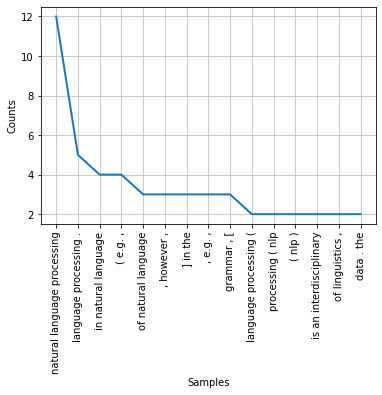

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [ ]:
# Frequency distribution of ngrams
freq_dist_ngrams = FreqDist(grams_n)
freq_dist_ngrams.plot(15)

#### 2.2 b

In [ ]:
def find_weighted_frequency(n, sentences):
  """
  creates the ngrams from the sentence corpus
  Returns sorted weighted frequencies of ngrams and Tf Idf vectorizer
  """
  vectorizer = TfidfVectorizer(ngram_range=(n, n))
  # X is a sparse matrix
  X = vectorizer.fit_transform(sentences)
  #print('Features, names', vectorizer.get_feature_names_out())
  df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
  # convert from sparse to dense
  ngram_tf_idf = df.sum(axis=0)
  d = ngram_tf_idf.to_dict()
  # sorting the ngrams based on weighted term frequency in descending order
  d = sorted(d.items(), key=lambda x:x[1], reverse=True)
  return d, vectorizer
  #for each in d.items():
  #  print(each)

In [ ]:
ngram_freqs, vectorizer = find_weighted_frequency(n, sentences)


In [ ]:
ngram_freqs[:20]

[('natural language processing', 2.0472477104781506),
 ('coarse division given', 1.0),
 ('machine learning algorithms', 0.8519354846311136),
 ('language processing roots', 0.6634121736137125),
 ('processing roots 1950s', 0.6634121736137125),
 ('language processing tasks', 0.6631149769936411),
 ('hand written rules', 0.5663102273786268),
 ('language processing systems', 0.45969659994479883),
 ('natural language understanding', 0.44432398212786794),
 ('commonly researched tasks', 0.43551884853852296),
 ('following list commonly', 0.43551884853852296),
 ('list commonly researched', 0.43551884853852296),
 ('researched tasks natural', 0.43551884853852296),
 ('tasks natural language', 0.43551884853852296),
 ('contexts statistical interpretability', 0.4082482904638631),
 ('continue relevant contexts', 0.4082482904638631),
 ('drawback statistical methods', 0.4082482904638631),
 ('elaborate feature engineering', 0.4082482904638631),
 ('however continue relevant', 0.4082482904638631),
 ('interpr

#### 2.2 c

In [ ]:
sentences_scores_list = []

def calculate_sentence_scores_ngram(n, sentences, vectorizer):
  """
  calculates sentence score for each sentence in the corpus
  """
  vectorizer = TfidfVectorizer(ngram_range=(1, n))
  # fitting tf-idf for 1 to n grams
  X = vectorizer.fit_transform(sentences)

  for i in range(len(sentences)):
    ngram_tfidf = vectorizer.transform([sentences[i]])
    # Calculating the sentence score as the sum of the TF IDF weights of the ngrams
    sentence_score = np.sum(ngram_tfidf)
    # appending all sentences scores to a list
    sentences_scores_list.append(sentence_score)




In [ ]:
n = 3 # ngrams
calculate_sentence_scores_ngram(n, sentences, vectorizer)
# calculating average sentence scores
sentences_scores_list = sentences_scores_list/sentences_length

In [ ]:
assert len(sentences_scores_list) == len(sentences)
sentences_orig_string = [' '.join(sent) for sent in sentences_orig]
# Mapping sentences scores with original sentences
sentence_pairs = list(zip(sentences_scores_list, sentences_orig_string))
# order the sentence pairs in descending order of sentence scores
sentence_pairs.sort(key = lambda x: x[0], reverse=True)

for s in sentence_pairs[:10]:
    print(s)

(0.3491821555468993, 'A coarse division is given below . \n\n')
(0.3263442636930275, 'Natural language processing has its roots in the 1950s .')
(0.3247968968400032, 'A major drawback of statistical methods is that they require elaborate feature engineering .')
(0.30882397815880946, 'Since 2015,[20 ] the field has thus largely abandoned statistical methods and shifted to neural networks for machine learning .')
(0.3003226499514399, 'The proposed test includes a task that involves the automated interpretation and generation of natural language . \n\n')
(0.2949944807415735, 'Since the neural turn , statistical methods in NLP research have been largely replaced by neural networks .')
(0.2933252901965463, 'The cache language models upon which many speech recognition systems now rely are examples of such statistical models .  ')
(0.2797244332265072, 'Though natural language processing tasks are closely intertwined , they can be subdivided into categories for convenience .')
(0.2788755316750

#### 2.2 d

In [ ]:
N=10

In [ ]:
# generating summary with top N scored sentences
summary = ""
for score, sent in sentence_pairs[:N]:

  summary += " "+ sent

summary

' A coarse division is given below . \n\n Natural language processing has its roots in the 1950s . A major drawback of statistical methods is that they require elaborate feature engineering . Since 2015,[20 ] the field has thus largely abandoned statistical methods and shifted to neural networks for machine learning . The proposed test includes a task that involves the automated interpretation and generation of natural language . \n\n Since the neural turn , statistical methods in NLP research have been largely replaced by neural networks . The cache language models upon which many speech recognition systems now rely are examples of such statistical models .   Though natural language processing tasks are closely intertwined , they can be subdivided into categories for convenience . Many different classes of machine - learning algorithms have been applied to natural - language - processing tasks . Challenges in natural language processing frequently involve speech recognition , natural 

In [ ]:
k =3

In [ ]:
# most frequent k ngram tokens
ngram_freqs_tokens = [key for key, value in ngram_freqs][:k]

In [ ]:
# Generating summary with sentences having most frequent k ngram tokens
count =0
summary = ""
for score, sent in sentence_pairs:
  for each in ngram_freqs_tokens:
    if each in sent:
      summary += " "+ sent
      count += 1
      break


In [ ]:
print("No of sentences used for summary with to K tokens - ", count)

No of sentences used for summary with to K tokens -  11


In [ ]:

print(summary)

 Though natural language processing tasks are closely intertwined , they can be subdivided into categories for convenience . Challenges in natural language processing frequently involve speech recognition , natural - language understanding , and natural - language generation . Up to the 1980s , most natural language processing systems were based on complex sets of hand - written rules .   The following is a list of some of the most commonly researched tasks in natural language processing . Starting in the late 1980s , however , there was a revolution in natural language processing with the introduction of machine learning algorithms for language processing .   Some of the earliest - used machine learning algorithms , such as decision trees , produced systems of hard if - then rules similar to existing hand - written rules .   In some areas , this shift has entailed substantial changes in how NLP systems are designed , such that deep neural network - based approaches may be viewed as a 

**Compare these two methods for text summarization. What are different and why? Please
clearly explain**

In the first method (k most frequent tokens): As the summarization is based on atleast one of most frequent tokens, the summary will have sentences which are very frequent but it will miss less frequent important words.

In the second method(tokens that occur in atleast k sentences): It considers the tokens from the top k ranked sentences. Hence the summary will contain the sentences with important words and related words about the context.

** References **

[1]“sklearn.feature_extraction.text.TfidfVectorizer — scikit-learn 0.24.1 documentation,” scikit-learn.org. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer

[2]A. Panchal, “Text Summarization using TF-IDF,” Medium, Jan. 19, 2020. https://towardsdatascience.com/text-summarization-using-tf-idf-e64a0644ace3
‌
‌

In [ ]:
%%shell
jupyter nbconvert --to html ///content/AIT526_Lab2.ipynb

[NbConvertApp] Converting notebook ///content/AIT526_Lab2.ipynb to html
[NbConvertApp] Writing 422163 bytes to ///content/AIT526_Lab2.html
